# This notebook will compute the relation mean-inflow vs updraft ratio for all our expriments with TCs from days 60-70, 70-80, 80-90, 90-100

In [3]:
using NetCDF, CairoMakie, AvailablePotentialEnergyFramework, Statistics, Distributed, Pkg, JLD, StatsBase, Unitful, RamirezReyes_MECFeedbackInTCWorld, LsqFit

In [2]:
# addprocs(6)
# @everywhere begin
#    import Pkg
#     Pkg.activate("/global/homes/a/aramreye/RamirezReyes_MECFeedbackInTCWorld/")
#     using NetCDF, CairoMakie, AvailablePotentialEnergyFramework, Statistics, Distributed, Pkg, JLD, StatsBase, Unitful, RamirezReyes_MECFeedbackInTCWorld
# end

In [4]:
data_dir = "/global/cscratch1/sd/aramreye/for_postprocessing/MECFeedback/CompositeOutputs_50d_9hpa/"
plots_dir = "/global/u2/a/aramreye/RamirezReyes_MECFeedbackInTCWorld/plotsandanimations/"
large_data_dir = "$(ENV["SCRATCH"])/for_postprocessing/largencfiles/"

"/global/cscratch1/sd/aramreye/for_postprocessing/largencfiles/"

In [5]:
nudging_time_list                 = ["5e-1h", "1h", "2h", "3h", "5h", "8h", "5e-1day", "1day", "2day", "5day", "10day",  "15day"]
experiment_labels_for_file = "τ = " .* ["½h", "1h", "2h", "3h", "5h", "8h", "12h", "1d", "2d","5day", "10d",  "15d"];
experiment_labels_for_plot = "τᵣ = " .* ["½h", "1h", "2h", "3h", "5h", "8h", "12h", "1d", "2d","5day", "10d",  "15d"];
push!(experiment_labels_for_plot, "Control");
push!(experiment_labels_for_file, "No nudging");

In [6]:
file_list_2d = string.("f5e-4_2km_1000km_homoRad_homoSfc_nudgeClearsky_",nudging_time_list,"_2d.nc")
push!(file_list_2d,"f5e-4_2km_1000km_homoRad_homoSfc_2d.nc")
file_list_3d = string.("f5e-4_2km_1000km_homoRad_homoSfc_nudgeClearsky_",nudging_time_list,"_3d.nc")
push!(file_list_3d,"f5e-4_2km_1000km_homoRad_homoSfc_3d.nc");

In [7]:
z_grd = [50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1178.57142857143 1385.71428571429 1671.42857142857 2035.71428571429 2478.57142857143 3000 3600 4200 4800 5400 6000 6600 7200 7800 8400 9000 9600 10200 10800 11400 12000 12600 13200 13800 14400 15000 15600 16200 16800 17400 18000 18600 19200 19800 20400 21000 21600 22200 22800 23400 24000 24600 25200 25800 26400 27000 27600 28200 28800 29400 30000 30600 31200 31800 32400 33000 33600 34200 34800];
x = 1e-3collect(range(0,step=2000,length=255))
y = x
z_iter = 3:56;
x_iter = 2:100
radiusbins = 1000:2000:725000;
length(radiusbins)

363

In [8]:
z_index = findmin(x -> abs(x - 6000), z_grd)[2][2]

32

In [8]:
# days_list = [(60,70),(70,80),(80,90),(90,100)]
# files_indices = 3:(2+length(file_list_2d[3:end]))

In [9]:
# updraft_ratio_and_inflow_and_maxv = pmap(params -> read_file_and_compute_updraft_ratio_and_mean_inflow(radiusbins,large_data_dir,file_list_2d[params[1]],file_list_3d[params[1]],z_index,params[2]),  Iterators.product(files_indices,days_list))

In [10]:
# updraft_ratios_wrt_half = [elem[1][1] for elem in updraft_ratio_and_inflow_and_maxv[:]]
# updraft_ratios_wrt_total = [elem[1][2] for elem in updraft_ratio_and_inflow_and_maxv[:]]
# inflows = [elem[2] for elem in updraft_ratio_and_inflow_and_maxv[:]];
# max_tangential_winds = [elem[3] for elem in updraft_ratio_and_inflow_and_maxv[:]];

In [11]:
# save("$(ENV["SCRATCH"])/updraft_ratio_and_inflow.jld", "radiusbins", radiusbins,"updraft_ratios_wrt_total",updraft_ratios_wrt_total,"updraft_ratios_wrt_half",updraft_ratios_wrt_half,"inflows",inflows,"max_tangential_winds",max_tangential_winds)

In [9]:
ds = load("$(ENV["SCRATCH"])/updraft_ratio_and_inflow.jld")
inflows = ds["inflows"]
updraft_ratios_wrt_total = ds["updraft_ratios_wrt_total"];
updraft_ratios_wrt_half = ds["updraft_ratios_wrt_half"];
max_tangential_winds = ds["max_tangential_winds"];

In [10]:
normalized_inflows = inflows ./ max_tangential_winds;

In [47]:
set_theme!(fontsize=30,
    Axis = (
        xminorticksvisible = false,
        yminorticksvisible = false,
        xminorgridvisible = false,
        yminorgridvisible = false,
        xgridvisible = true,
        ygridvisible = true,
        xticks = LinearTicks(6),
        xminorticks = IntervalsBetween(4)),
    Scatter = (cycle = Cycle([:color, :marker], covary = true),markersize = 20),
    Lines = (cycle = Cycle([:color , :linestyle], covary = false), linewidth = 3.0f0)
)
subplot_label_fontsize = 30.0f0
axis_label_fontsize = 30.0f0
linewidth = 1.5f0
legend_labelsize = 30.0f0

30.0f0

In [12]:
cor(normalized_inflows, exp.(-2.77abs.(updraft_ratios_wrt_total)))

-0.7774719147682411

In [13]:
@. model(x,p) = p[1]*exp(p[2]*(x))

model (generic function with 1 method)

In [14]:
filtered_x = updraft_ratios_wrt_total[updraft_ratios_wrt_total .<= 0.5]
filtered_y_no_normalized = abs.(inflows[updraft_ratios_wrt_total .<= 0.5])
fit_no_normalized = curve_fit(model,filtered_x, filtered_y_no_normalized, [0.5, 0.5])

filtered_y_normalized = abs.(normalized_inflows[updraft_ratios_wrt_total .<= 0.5])
fit_normalized = curve_fit(model,filtered_x, filtered_y_normalized, [0.5, 0.5])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([0.013144695319465168, -2.775246702631012], [-0.0008552196895350757, -0.0004684513782277355, 0.00042644002828076634, 0.00014238578885382566, 0.0012044200444832798, -0.0005893548852180415, 0.0014224238596738893, 0.002073749449588426, 0.001393561467337383, -0.0022435917863801377  …  0.0006720348482877649, -0.00012878984303707746, -0.001381940559667596, -9.140627539067948e-6, -0.0004057687608821003, 0.0002786793285993461, 8.708782863849768e-6, 0.0024629948145304453, -0.0013713028033334324, -0.007712179135219864], [0.28284741781591743 0.0016918120736077544; 0.2627488576128148 0.0016633250401621408; … ; 0.45675493663223743 0.001695240005232353; 0.49672223351023664 0.0016462260960875262], true, Float64[])

In [15]:
coef(fit_no_normalized)

2-element Vector{Float64}:
  0.3546111820650696
 -5.093128757804278

In [16]:
coef(fit_normalized)

2-element Vector{Float64}:
  0.013144695319465168
 -2.775246702631012

In [17]:
model(0:1,coef(fit_normalized))

2-element Vector{Float64}:
 0.013144695319465168
 0.0008193627105412548

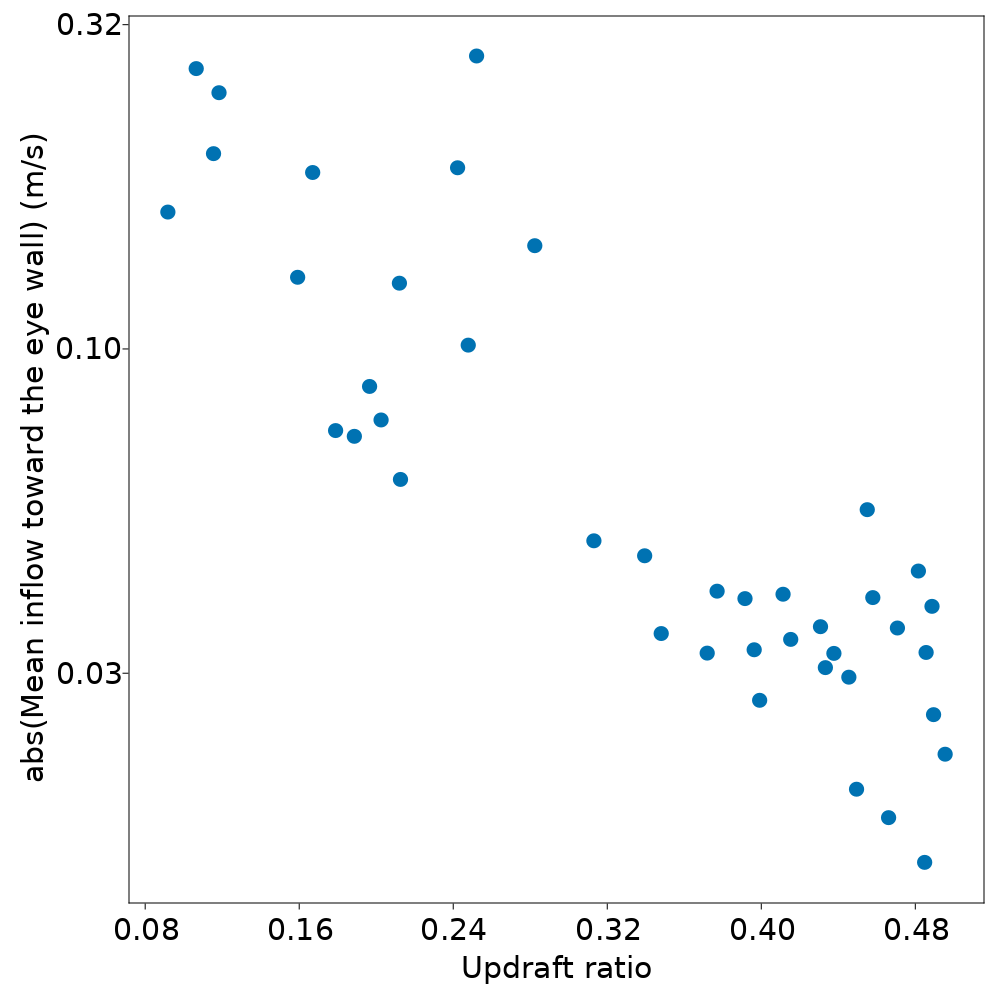

In [32]:
fig = Figure(resolution = (1000,1000))
ax1 = Axis(fig[1,1], xlabel="Updraft ratio", ylabel = "abs(Mean inflow toward the eye wall) (m/s)", ytickformat="{:.2f}", yscale = log10)
scatter!(ax1,updraft_ratios_wrt_total[updraft_ratios_wrt_total .<= 0.5],abs.(inflows[updraft_ratios_wrt_total .<= 0.5]))
#lines!(ax1,range(0.01,stop=0.5,length=100),  model(range(0.01,stop=0.5,length=100), coef(fit_no_normalized)))
fig

In [33]:
plot_name = "updraft_ratio_vs_inflow"
save(joinpath(plots_dir,plot_name*".png"), fig,px_per_unit=4)
save(joinpath(plots_dir,plot_name*".eps"), fig)
save(joinpath(plots_dir,plot_name*".pdf"), fig)

CairoScreen{Cairo.CairoSurfaceIOStream{UInt32}} with surface:
Cairo.CairoSurfaceIOStream{UInt32}(Ptr{Nothing} @0x000000000d4438c0, 750.0, 750.0, IOContext(IOStream(<file /global/u2/a/aramreye/RamirezReyes_MECFeedbackInTCWorld/plotsandanimations/updraft_ratio_vs_inflow.pdf>)))


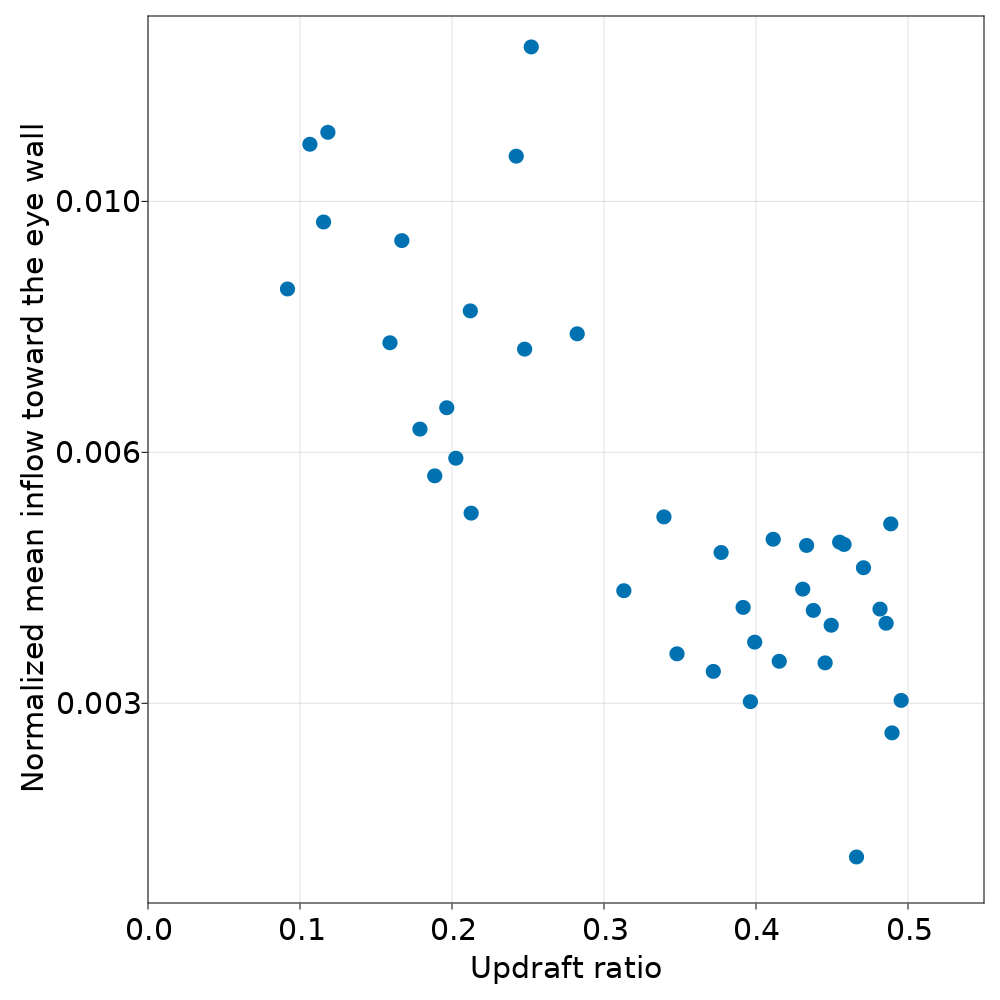

In [51]:
fig = Figure(resolution = (1000,1000))
ax1 = Axis(fig[1,1], xlabel="Updraft ratio", ylabel = "Normalized mean inflow toward the eye wall", ytickformat="{:.3f}", yscale = log10)
scatter!(ax1,updraft_ratios_wrt_total[updraft_ratios_wrt_total .<= 0.5],abs.(inflows[updraft_ratios_wrt_total .<= 0.5])./(max_tangential_winds[updraft_ratios_wrt_total .<= 0.5]))
#lines!(ax1,range(0.01,stop=0.5,length=100),  model(range(0.01,stop=0.5,length=100), coef(fit_normalized)), color=:gray)
#text!(ax1, [L"f(x) = 0.01  \exp(-2.77x)"], position=[Point2f(0.25, 0.009)], textsize = 30)
xlims!(ax1,(0.0,0.55))
ylims!(ax1,(0.002,0.0153))
fig

In [52]:
plot_name = "updraft_ratio_vs_normalized_inflow"
save(joinpath(plots_dir,plot_name*".png"), fig,px_per_unit=4)
save(joinpath(plots_dir,plot_name*".eps"), fig)
save(joinpath(plots_dir,plot_name*".pdf"), fig)

CairoScreen{Cairo.CairoSurfaceIOStream{UInt32}} with surface:
Cairo.CairoSurfaceIOStream{UInt32}(Ptr{Nothing} @0x000000000ddc3180, 750.0, 750.0, IOContext(IOStream(<file /global/u2/a/aramreye/RamirezReyes_MECFeedbackInTCWorld/plotsandanimations/updraft_ratio_vs_normalized_inflow.pdf>)))
